<a href="https://colab.research.google.com/github/cauancalmeida/Data_Science_studies/blob/main/Analisando_e_Prevendo_series_temporais.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

###**Importando os dados**

> Você pode checar a documentação da biblioteca Pandas [aqui](https://pandas.pydata.org/).

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/alura-cursos/data_science_projeto/main/Dados/bicicletas.csv')

In [3]:
df.head()

,data_hora,contagem,temperatura,sensacao_termica,umidade,velocidade_vento,clima,feriado,fim_de_semana,estacao
0,2015-01-04 00:00:00,182,3.0,2.0,93.0,6.0,Nublado,Não,Sim,Inverno
1,2015-01-04 01:00:00,138,NaN,NaN,93.0,5.0,Céu limpo,Não,Sim,Inverno
2,2015-01-04 02:00:00,134,2.5,2.5,96.5,0.0,Céu limpo,Não,Sim,Inverno
3,2015-01-04 03:00:00,72,2.0,2.0,100.0,0.0,Céu limpo,Não,Sim,Inverno
4,2015-01-04 04:00:00,47,NaN,NaN,93.0,6.5,Céu limpo,Não,Sim,Inverno


###**Tratando dados nulos**

In [4]:
df.shape

(17429, 10)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17429 entries, 0 to 17428
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   data_hora         17429 non-null  object 
 1   contagem          17429 non-null  int64  
 2   temperatura       17406 non-null  float64
 3   sensacao_termica  17406 non-null  float64
 4   umidade           17429 non-null  float64
 5   velocidade_vento  17429 non-null  float64
 6   clima             17429 non-null  object 
 7   feriado           17429 non-null  object 
 8   fim_de_semana     17429 non-null  object 
 9   estacao           17429 non-null  object 
dtypes: float64(4), int64(1), object(5)
memory usage: 1.3+ MB


In [6]:
df.isnull().sum()

,0
data_hora,0
contagem,0
temperatura,23
sensacao_termica,23
umidade,0
velocidade_vento,0
clima,0
feriado,0
fim_de_semana,0
estacao,0


>Você pode encontrar informações detalhadas sobre o método *interpolate()* da biblioteca Pandas [aqui](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.interpolate.html).

In [7]:
df['temperatura'] = df['temperatura'].interpolate(method='linear')
df['sensacao_termica'] = df['sensacao_termica'].interpolate(method='linear')

In [8]:
df.head(10)

,data_hora,contagem,temperatura,sensacao_termica,umidade,velocidade_vento,clima,feriado,fim_de_semana,estacao
0,2015-01-04 00:00:00,182,3.00,2.00,93.0,6.0,Nublado,Não,Sim,Inverno
1,2015-01-04 01:00:00,138,2.75,2.25,93.0,5.0,Céu limpo,Não,Sim,Inverno
2,2015-01-04 02:00:00,134,2.50,2.50,96.5,0.0,Céu limpo,Não,Sim,Inverno
3,2015-01-04 03:00:00,72,2.00,2.00,100.0,0.0,Céu limpo,Não,Sim,Inverno
4,2015-01-04 04:00:00,47,2.00,2.00,93.0,6.5,Céu limpo,Não,Sim,Inverno
5,2015-01-04 05:00:00,46,2.00,2.00,93.0,4.0,Céu limpo,Não,Sim,Inverno
6,2015-01-04 06:00:00,51,1.00,-1.00,100.0,7.0,Parcialmente nublado,Não,Sim,Inverno
7,2015-01-04 07:00:00,75,1.00,-1.00,100.0,7.0,Parcialmente nublado,Não,Sim,Inverno
8,2015-01-04 08:00:00,131,1.50,-1.00,96.5,8.0,Parcialmente nublado,Não,Sim,Inverno
9,2015-01-04 09:00:00,301,2.00,-0.50,100.0,9.0,Nublado,Não,Sim,Inverno


###**Identificando e removendo dados duplicados**

In [9]:
df.duplicated().sum()

15

In [10]:
# Identificando as linhas duplicadas no DataFrame
duplicatas = df.duplicated(keep=False)

# Selecionando as linhas duplicadas com base no resultado anterior
linhas_duplicadas = df[duplicatas]

# Ordenando as linhas duplicadas pela coluna 'data_hora'
linhas_duplicadas.sort_values(by='data_hora')

,data_hora,contagem,temperatura,sensacao_termica,umidade,velocidade_vento,clima,feriado,fim_de_semana,estacao
519,2015-01-25 16:00:00,1238,8.0,5.0,71.0,18.0,Nublado,Não,Sim,Inverno
17422,2015-01-25 16:00:00,1238,8.0,5.0,71.0,18.0,Nublado,Não,Sim,Inverno
869,2015-02-09 06:00:00,479,5.0,3.5,87.0,6.5,Parcialmente nublado,Não,Não,Inverno
17417,2015-02-09 06:00:00,479,5.0,3.5,87.0,6.5,Parcialmente nublado,Não,Não,Inverno
3655,2015-06-05 18:00:00,3411,23.0,23.0,50.0,26.0,Parcialmente nublado,Não,Não,Verão
17425,2015-06-05 18:00:00,3411,23.0,23.0,50.0,26.0,Parcialmente nublado,Não,Não,Verão
4167,2015-06-27 02:00:00,337,15.5,15.5,74.5,18.0,Parcialmente nublado,Não,Sim,Verão
17421,2015-06-27 02:00:00,337,15.5,15.5,74.5,18.0,Parcialmente nublado,Não,Sim,Verão
4658,2015-07-17 14:00:00,1882,24.5,24.5,44.0,29.5,Parcialmente nublado,Não,Não,Verão
17418,2015-07-17 14:00:00,1882,24.5,24.5,44.0,29.5,Parcialmente nublado,Não,Não,Verão


>Você pode encontrar informações detalhadas sobre o método *drop_duplicates()* da biblioteca Pandas [aqui](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.drop_duplicates.html).

In [11]:
#removendo as linhas duplicadas
df_limpo = df.drop_duplicates()

In [12]:
#verificando o tamanho do df limpo
df_limpo.shape

(17414, 10)

##Analise descritiva

In [13]:
#vizualiando as medidas descritivas do DF
df_limpo.describe()

,contagem,temperatura,sensacao_termica,umidade,velocidade_vento
count,17414.000000,17414.000000,17414.000000,17414.000000,17414.000000
mean,1143.101642,12.468206,11.521080,72.324954,15.913063
std,1085.108068,5.571670,6.614799,14.313186,7.894570
min,0.000000,-1.500000,-6.000000,20.500000,0.000000
25%,257.000000,8.000000,6.000000,63.000000,10.000000
50%,844.000000,12.500000,12.500000,74.500000,15.000000
75%,1671.750000,16.000000,16.000000,83.000000,20.500000
max,7860.000000,34.000000,34.000000,100.000000,56.500000


In [14]:
#importando as bibliotecas graficas
import seaborn as sns
import matplotlib.pyplot as plt

<ipython-input-15-e332c52d5a11>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_limpo, x=df_limpo.temperatura, bins=15)


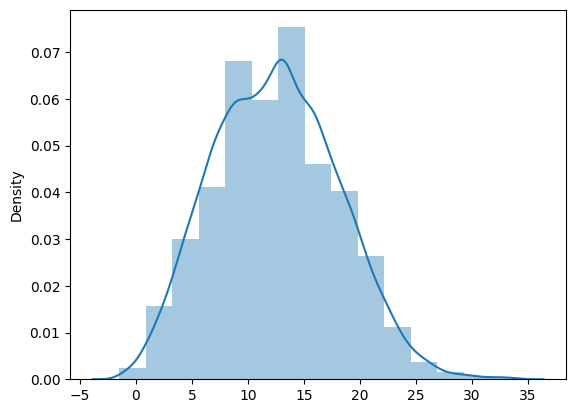

In [15]:
#histograma da temperatura
sns.distplot(df_limpo, x=df_limpo.temperatura, bins=15)
plt.show()

<ipython-input-16-40694c88bf75>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_limpo, x=df_limpo.sensacao_termica, bins=15)


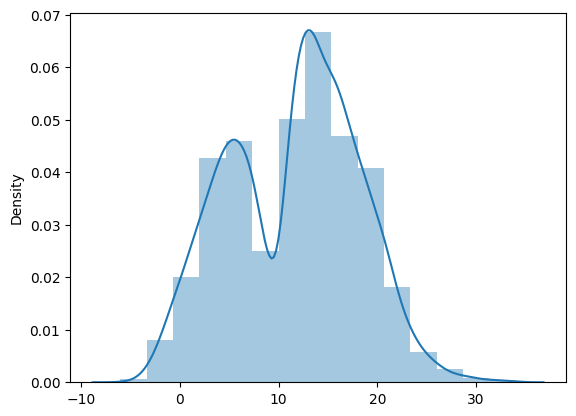

In [16]:
#histograma da sensação termica
sns.distplot(df_limpo, x=df_limpo.sensacao_termica, bins=15)
plt.show()

<ipython-input-17-79c6bc0f2047>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_limpo, x=df_limpo.umidade, bins=15)


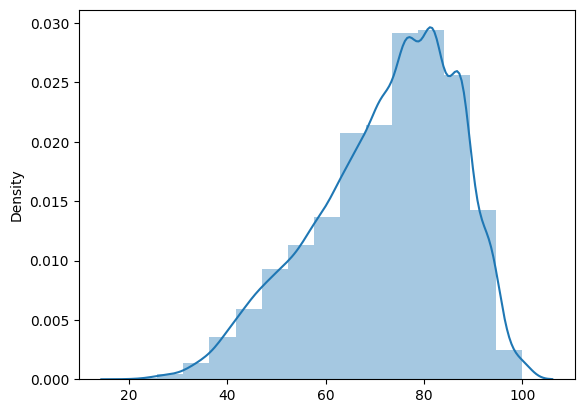

In [17]:
#histograma da umidade
sns.distplot(df_limpo, x=df_limpo.umidade, bins=15)
plt.show()

<ipython-input-18-24e0969c3390>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_limpo, x=df_limpo.velocidade_vento, bins=15)


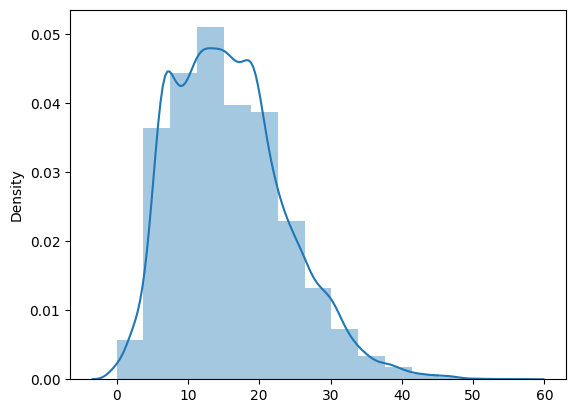

In [18]:
#histograma da velocidade do vento
sns.distplot(df_limpo, x=df_limpo.velocidade_vento, bins=15)
plt.show()

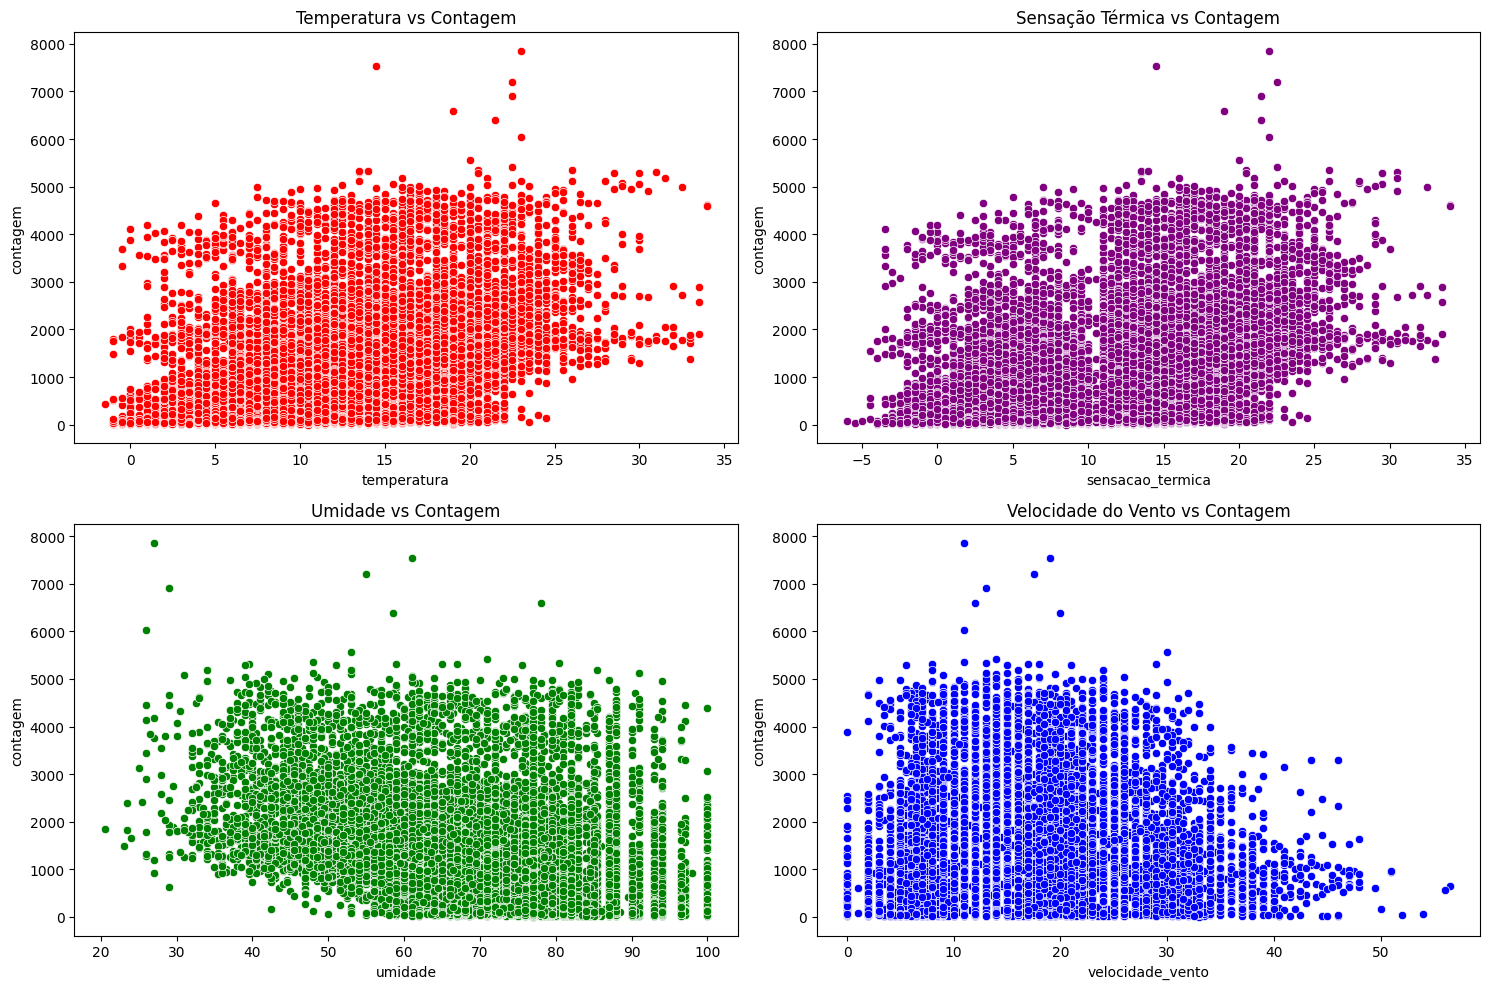

In [19]:
# Criando as figuras
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# Plotando os graficos
sns.scatterplot(ax=axes[0, 0], data=df_limpo, x='temperatura', y='contagem',color='red')
axes[0, 0].set_title('Temperatura vs Contagem')
sns.scatterplot(ax=axes[0, 1], data=df_limpo, x='sensacao_termica', y='contagem',color='purple')
axes[0, 1].set_title('Sensação Térmica vs Contagem')
sns.scatterplot(ax=axes[1, 0], data=df_limpo, x='umidade', y='contagem',color='green')
axes[1, 0].set_title('Umidade vs Contagem')
sns.scatterplot(ax=axes[1, 1], data=df_limpo, x='velocidade_vento', y='contagem',color='blue')
axes[1, 1].set_title('Velocidade do Vento vs Contagem')

# Ajustando o layout e exubindo os graficos
plt.tight_layout()
plt.show()

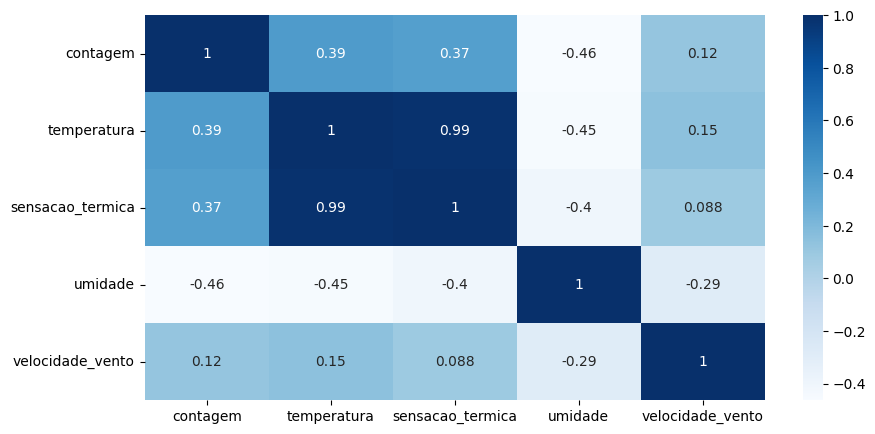

In [20]:
#grafico de calor para verificar a correlação entre as variaveis
plt.figure(figsize=(10, 5))
sns.heatmap(df_limpo.corr(numeric_only=True), annot=True, cmap='Blues')
plt.show()

In [22]:
df_limpo.describe(include=[object])

,data_hora,clima,feriado,fim_de_semana,estacao
count,17414,17414,17414,17414,17414
unique,17414,6,2,2,4
top,2015-01-04 00:00:00,Céu limpo,Não,Não,Primavera
freq,1,6150,17030,12444,4394


In [32]:
for col in df_limpo.columns:
  if df_limpo[col].dtype == 'category':
    print(f'Coluna: {col}')
    print(df_limpo[col].unique())

Coluna: data_hora
['2015-01-04 00:00:00', '2015-01-04 01:00:00', '2015-01-04 02:00:00', '2015-01-04 03:00:00', '2015-01-04 04:00:00', ..., '2017-01-03 19:00:00', '2017-01-03 20:00:00', '2017-01-03 21:00:00', '2017-01-03 22:00:00', '2017-01-03 23:00:00']
Length: 17414
Categories (17414, object): ['2015-01-04 00:00:00', '2015-01-04 01:00:00', '2015-01-04 02:00:00',
                             '2015-01-04 03:00:00', ..., '2017-01-03 20:00:00', '2017-01-03 21:00:00',
                             '2017-01-03 22:00:00', '2017-01-03 23:00:00']
Coluna: clima
['Nublado', 'Céu limpo', 'Parcialmente nublado', 'Chuva leve', 'Neve', 'Chuva com trovoadas']
Categories (6, object): ['Chuva com trovoadas', 'Chuva leve', 'Céu limpo', 'Neve', 'Nublado',
                         'Parcialmente nublado']
Coluna: feriado
['Não', 'Sim']
Categories (2, object): ['Não', 'Sim']
Coluna: fim_de_semana
['Sim', 'Não']
Categories (2, object): ['Não', 'Sim']
Coluna: estacao
['Inverno', 'Primavera', 'Verão', 'Outono']

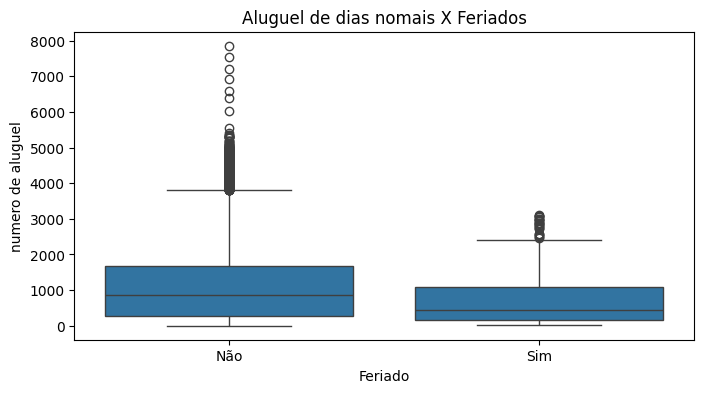

In [36]:
plt.figure (figsize =(8,4))

sns.boxplot(x='feriado', y='contagem', data=df_limpo)
plt.title('Aluguel de dias nomais X Feriados')
plt.xlabel("Feriado")
plt.ylabel("numero de aluguel")
plt.show()

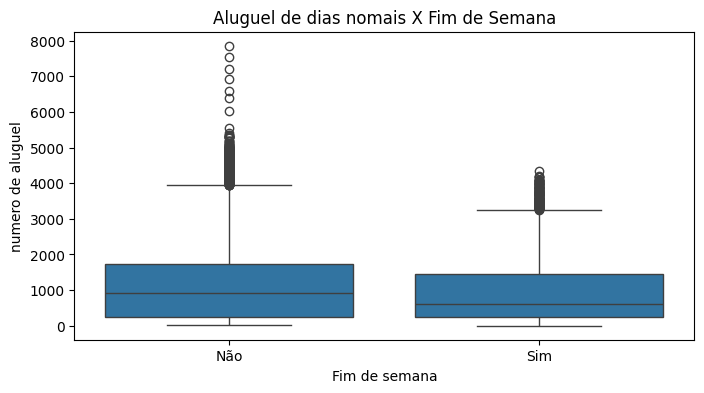

In [37]:
plt.figure (figsize =(8,4))

sns.boxplot(x='fim_de_semana', y='contagem', data=df_limpo)
plt.title('Aluguel de dias nomais X Fim de Semana')
plt.xlabel("Fim de semana")
plt.ylabel("numero de aluguel")
plt.show()

In [38]:
mediana_feriado = df_limpo.groupby('feriado')['contagem'].median()
mediana_fds = df_limpo.groupby('fim_de_semana')['contagem'].median()

<ipython-input-38-e4a4804e8221>:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  mediana_feriado = df_limpo.groupby('feriado')['contagem'].median()
<ipython-input-38-e4a4804e8221>:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  mediana_fds = df_limpo.groupby('fim_de_semana')['contagem'].median()


In [39]:
mediana_feriado

,contagem
feriado,
Não,855.0
Sim,439.5


In [40]:
mediana_fds

,contagem
fim_de_semana,
Não,927.0
Sim,619.0


In [56]:
df_clima = df_limpo.groupby('clima')['contagem'].sum().reset_index()
df_clima = df_clima.sort_values(by='contagem', ascending = False)
df_clima

<ipython-input-56-52f68f3846b3>:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_clima = df_limpo.groupby('clima')['contagem'].sum().reset_index()


,clima,contagem
2,Céu limpo,7146847
5,Parcialmente nublado,6965558
4,Nublado,4243887
1,Chuva leve,1526461
3,Neve,15051
0,Chuva com trovoadas,8168


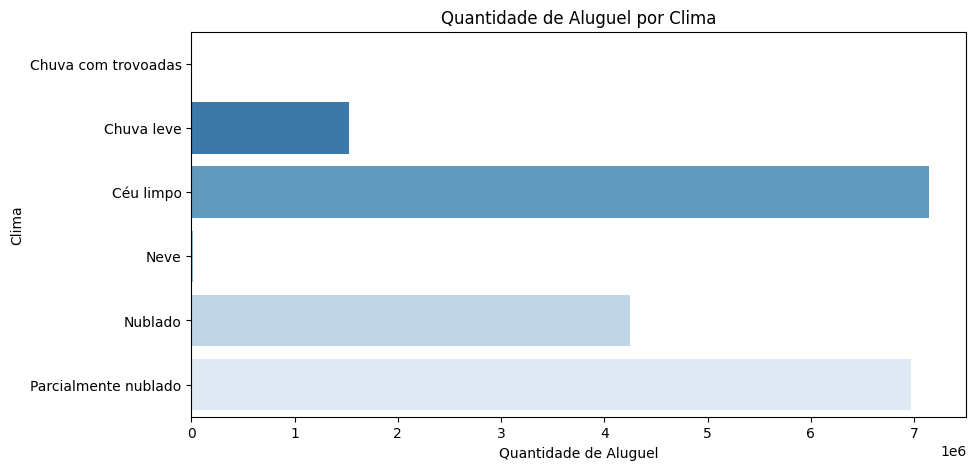

In [55]:

plt.figure(figsize=(10, 5))
sns.barplot(x='contagem', y='clima', data=df_clima, hue='clima', palette='Blues_r', orient='h')
plt.title('Quantidade de Aluguel por Clima')
plt.xlabel('Quantidade de Aluguel')
plt.ylabel('Clima')
plt.show()

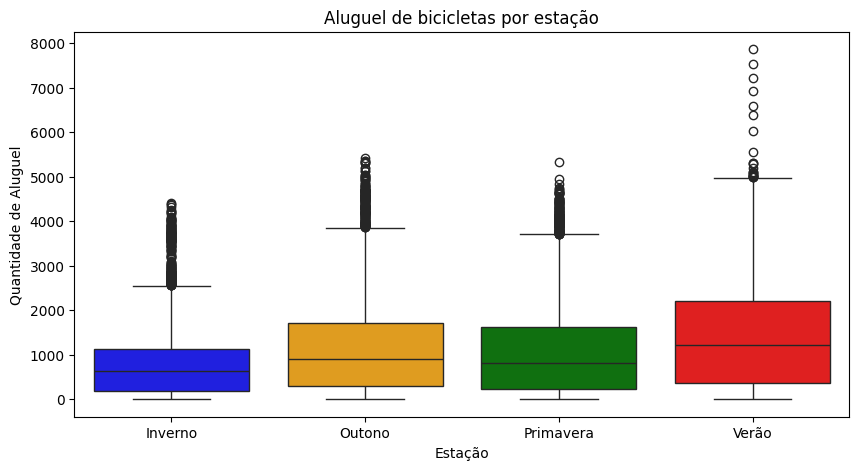

In [57]:
plt.figure(figsize=(10, 5))
paleta_cores= {'Primavera': 'green', 'Verão': 'red', 'Outono': 'orange', 'Inverno': 'blue'}
sns.boxplot(x='estacao', y='contagem', data=df_limpo, hue='estacao', palette= paleta_cores)
plt.title('Aluguel de bicicletas por estação')
plt.xlabel('Estação')
plt.ylabel('Quantidade de Aluguel')
plt.show()

In [58]:
df_limpo.groupby('estacao')['contagem'].median()

<ipython-input-58-9a6c94b6999d>:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_limpo.groupby('estacao')['contagem'].median()


,contagem
estacao,
Inverno,632.0
Outono,898.0
Primavera,823.0
Verão,1214.0


In [60]:
from scipy.stats import mannwhitneyu

primavera = df_limpo[df_limpo['estacao'] == 'Primavera']['contagem']
outrono = df_limpo[df_limpo['estacao'] == 'Outono']['contagem']

stat, p = mannwhitneyu(primavera, outrono, alternative='two-sided')
stat, p

(9044682.5, 0.0004762100221646296)